In [3]:
import csv
import os
import pandas as pd
import numpy as np

In [6]:
data=pd.read_csv('nyc_taxi_2019-01.csv')

In [7]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.50,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.00,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.00,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667787,2,2019-01-31 23:57:36,2019-02-01 00:18:39,1,4.79,1,N,263,4,1,18.0,0.5,0.5,3.86,0.0,0.3,23.16,0.0
7667788,2,2019-01-31 23:32:03,2019-01-31 23:33:11,1,0.00,1,N,193,193,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667789,2,2019-01-31 23:36:36,2019-01-31 23:36:40,1,0.00,1,N,264,264,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0
7667790,2,2019-01-31 23:14:53,2019-01-31 23:15:20,1,0.00,1,N,264,7,1,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0


In [ ]:
# choosing certain column
data1=pd.read_csv('nyc_taxi',usecols=['passenger_count','trip_distance','payment_type','total_amount'])

In [9]:
data[['passenger_count','trip_distance','payment_type','total_amount']]

,passenger_count,trip_distance,payment_type,total_amount
0,1,1.50,1,9.95
1,1,2.60,1,16.30
2,3,0.00,1,5.80
3,5,0.00,2,7.55
4,5,0.00,2,55.55
...,...,...,...,...
7667787,1,4.79,1,23.16
7667788,1,0.00,1,0.00
7667789,1,0.00,1,0.00
7667790,1,0.00,1,0.00


#### 1. How many taxi rides had more than 8 passengers?

In [11]:
morethan8=data['passenger_count']>8

In [13]:
morethan8.sum()

9

In [19]:
morethan8.value_counts()

False    7667783
True           9
Name: passenger_count, dtype: int64

In [22]:
print(morethan8.sum(),'taxis had more than 8 passengers in their rides.')

9 taxis had more than 8 passengers in their rides.


#### 2. How many taxi rides had zero passengers?


In [78]:
zeropass=data['passenger_count']==0
zeropass

0          False
1          False
2          False
3          False
4          False
           ...  
7667787    False
7667788    False
7667789    False
7667790    False
7667791    False
Name: passenger_count, Length: 7667792, dtype: bool

In [80]:
# select datas using df[name]

data[zeropass]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
156,1,2019-01-01 00:32:24,2019-01-01 00:33:21,0,5.3,1,N,50,50,1,2.5,0.5,0.5,0.75,0.0,0.3,4.55,NaN
228,1,2019-01-01 00:00:50,2019-01-01 00:31:48,0,18.0,2,N,132,140,1,52.0,0.0,0.5,7.00,0.0,0.3,59.80,NaN
229,1,2019-01-01 00:38:32,2019-01-01 01:09:51,0,8.9,1,N,229,37,1,29.5,0.5,0.5,7.70,0.0,0.3,38.50,NaN
298,1,2019-01-01 00:45:19,2019-01-01 00:55:53,0,1.0,1,N,107,170,2,8.0,0.5,0.5,0.00,0.0,0.3,9.30,NaN
905,1,2019-01-01 00:20:15,2019-01-01 00:26:42,0,0.7,1,N,90,249,1,6.0,0.5,0.5,1.00,0.0,0.3,8.30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667552,1,2019-01-31 23:56:07,2019-02-01 00:13:46,0,2.8,1,N,264,264,1,13.5,0.5,0.5,1.50,0.0,0.3,16.30,0.0
7667581,1,2019-01-31 23:36:42,2019-01-31 23:57:43,0,4.8,1,N,161,13,1,17.5,0.5,0.5,2.00,0.0,0.3,20.80,0.0
7667612,1,2019-01-31 23:06:23,2019-01-31 23:18:20,0,3.2,1,N,68,239,1,12.0,0.5,0.5,2.65,0.0,0.3,15.95,0.0
7667764,1,2019-01-31 23:06:51,2019-01-31 23:15:06,0,1.4,1,N,162,186,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80,0.0


In [25]:
zeropass.sum()

117381

In [26]:
zeropass.value_counts()

False    7550411
True      117381
Name: passenger_count, dtype: int64

In [27]:
print(zeropass.sum(),'taxis had zero passengers in their rides.')

117381 taxis had zero passengers in their rides.


#### 3. How many taxi rides were paid for in cash, and cost more than $1,000?

 1= Credit card; 2= Cash; 3= No charge; 4= Dispute; 5= Unknown; 6= Voided trip.

In [38]:
cash_morethan1000=data.loc[(data['payment_type']==2) & (data['total_amount']>1000)]
cash_morethan1000

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
478791,1,2019-01-03 13:08:33,2019-01-03 13:08:53,1,0.1,6,N,264,264,2,6666.65,0.00,0.50,0.0,0.0,0.3,6667.45,NaN
3715690,2,2019-01-16 15:31:14,2019-01-21 15:22:08,1,0.0,99,N,265,265,2,1079.15,0.00,0.25,0.0,0.0,0.0,1079.40,NaN
4300990,1,2019-01-18 17:00:24,2019-01-18 18:09:22,1,21.7,2,N,181,181,2,52.00,4.50,0.50,0.0,3288.0,0.3,3345.30,NaN
5323430,1,2019-01-23 08:58:09,2019-01-23 08:58:09,1,0.0,1,Y,24,264,2,355676.98,535.38,2.42,0.0,0.0,0.0,356214.78,0.0
6827160,1,2019-01-28 21:31:15,2019-01-28 21:34:03,1,1.0,1,N,264,264,2,3004.00,-36.71,37.51,0.0,0.0,0.0,3004.80,0.0


In [44]:
cash_morethan1000.count()

VendorID                 5
tpep_pickup_datetime     5
tpep_dropoff_datetime    5
passenger_count          5
trip_distance            5
RatecodeID               5
store_and_fwd_flag       5
PULocationID             5
DOLocationID             5
payment_type             5
fare_amount              5
extra                    5
mta_tax                  5
tip_amount               5
tolls_amount             5
improvement_surcharge    5
total_amount             5
congestion_surcharge     2
dtype: int64

In [45]:
print('5 taxis were paid in cash and cost more than $1000.')

5 taxis were paid in cash and cost more than $1000.


#### 4. How many rides cost less than 0?

In [48]:
lessthan0=data.query('total_amount<0')
lessthan0

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
663,2,2019-01-01 00:32:56,2019-01-01 00:33:35,2,0.10,1,N,148,148,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN
2402,2,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,N,170,238,4,-19.0,-0.5,-0.5,0.0,0.0,-0.3,-20.3,NaN
2541,2,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,N,162,234,4,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-9.8,NaN
2544,2,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,N,234,234,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN
2547,2,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,N,234,234,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665612,2,2019-01-31 23:24:31,2019-01-31 23:25:52,1,0.34,1,N,161,237,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,0.0
7666343,2,2019-01-31 23:36:37,2019-01-31 23:37:44,1,0.17,1,N,68,158,3,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,0.0
7666452,2,2019-01-31 23:08:30,2019-01-31 23:19:27,2,0.58,1,N,162,229,3,-8.0,-0.5,-0.5,0.0,0.0,-0.3,-9.3,0.0
7666601,2,2019-01-31 23:42:48,2019-01-31 23:48:23,1,0.68,1,N,211,211,4,-5.5,-0.5,-0.5,0.0,0.0,-0.3,-6.8,0.0


In [50]:
len(lessthan0)

7131

In [51]:
print(len(lessthan0),'taxis cost less than 0.')

7131 taxis cost less than 0.


In [ ]:
#when u have two conditions
f3_1=data[condition1]
f3_2=data[condition2]
data[f3_1 & f3_2]

#### 5. How many rides traveled a below-average distance, but cost an above-average amount?

In [53]:
ave_dist=data['trip_distance'].mean()
ave_dist

2.8010838491708046

In [54]:
ave_cost=data['total_amount'].mean()
ave_cost

15.68222215901336

In [56]:
dist_cost=data.loc[(data['trip_distance']<ave_dist) & (data['total_amount']>ave_cost)]
dist_cost

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.60,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.00,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN
6,2,2018-11-28 16:29:37,2018-11-28 16:33:43,5,0.00,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN
10,1,2019-01-01 00:24:04,2019-01-01 00:47:06,2,2.80,1,N,246,162,1,15.0,0.5,0.5,3.25,0.0,0.3,19.55,NaN
32,2,2019-01-01 00:43:28,2019-01-01 00:49:42,1,1.03,2,N,238,239,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7667648,1,2019-01-31 23:03:27,2019-01-31 23:30:57,1,1.90,1,N,161,68,1,17.5,0.5,0.5,3.75,0.0,0.3,22.55,0.0
7667659,2,2019-01-31 23:24:01,2019-01-31 23:24:05,1,0.00,2,N,146,146,1,52.0,0.0,0.5,10.56,0.0,0.3,63.36,0.0
7667665,2,2019-01-31 23:13:31,2019-01-31 23:43:26,1,2.34,1,N,48,125,1,19.5,0.5,0.5,4.16,0.0,0.3,24.96,0.0
7667729,2,2019-01-31 23:15:00,2019-01-31 23:27:20,2,2.72,1,N,144,68,1,12.0,0.5,0.5,2.66,0.0,0.3,15.96,0.0


In [57]:
len(dist_cost)

411255

In [58]:
print(len(dist_cost),'rides traveled a below-average distance, but cost an above-average amount.')

411255 rides traveled a below-average distance, but cost an above-average amount.


#### 6. How many of the rides that cost less than 0 were indeed for either a dispute (payment_type of 4) or a voided trip (payment_type of 6)?


In [62]:
dispute_void=data.query('total_amount<0 & payment_type==4 | payment_type==6')
dispute_void

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
2402,2,2019-01-01 00:14:18,2019-01-01 00:40:55,1,4.13,1,N,170,238,4,-19.0,-0.5,-0.5,0.0,0.0,-0.3,-20.3,NaN
2541,2,2019-01-01 00:31:27,2019-01-01 00:42:39,1,1.35,1,N,162,234,4,-8.5,-0.5,-0.5,0.0,0.0,-0.3,-9.8,NaN
2544,2,2019-01-01 00:45:57,2019-01-01 00:46:07,1,0.00,1,N,234,234,4,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,NaN
2547,2,2019-01-01 00:48:35,2019-01-01 00:49:59,1,0.16,1,N,234,234,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,NaN
4261,2,2019-01-01 00:10:25,2019-01-01 00:13:38,2,0.40,1,N,42,41,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657769,2,2019-01-31 23:15:49,2019-01-31 23:31:31,1,4.02,1,N,246,263,4,-15.0,-0.5,-0.5,0.0,0.0,-0.3,-16.3,0.0
7659620,2,2019-01-31 23:21:54,2019-01-31 23:26:45,2,0.84,1,N,170,161,4,-5.5,-0.5,-0.5,0.0,0.0,-0.3,-6.8,0.0
7661666,2,2019-01-31 23:51:42,2019-02-01 00:00:04,1,1.00,1,N,186,234,4,-7.0,-0.5,-0.5,0.0,0.0,-0.3,-8.3,0.0
7662723,2,2019-01-31 23:38:50,2019-01-31 23:53:59,1,2.57,1,N,164,141,4,-12.0,-0.5,-0.5,0.0,0.0,-0.3,-13.3,0.0


In [82]:
#can use len( ) or .count()
dispute_void_num=data.query('total_amount<0 & payment_type==4 | payment_type==6').count()
dispute_void_num

VendorID                 2666
tpep_pickup_datetime     2666
tpep_dropoff_datetime    2666
passenger_count          2666
trip_distance            2666
RatecodeID               2666
store_and_fwd_flag       2666
PULocationID             2666
DOLocationID             2666
payment_type             2666
fare_amount              2666
extra                    2666
mta_tax                  2666
tip_amount               2666
tolls_amount             2666
improvement_surcharge    2666
total_amount             2666
congestion_surcharge      963
dtype: int64

In [64]:
print(len(dispute_void),'rides cost less than 0 were indeed for either a dispute (payment_type of 4) or a voided trip (payment_type of 6).')

2666 rides cost less than 0 were indeed for either a dispute (payment_type of 4) or a voided trip (payment_type of 6).


#### 7. We will now find out the percentages of people who normally pay in cash vs credit card, to find out which payment type is the most common in taxi rides. 

1= Credit card; 2= Cash; 3= No charge; 4= Dispute; 5= Unknown; 6= Voided trip.

In [65]:
data['payment_type'].value_counts()

1    5486027
2    2137415
3      33186
4      11164
Name: payment_type, dtype: int64

In [67]:
#mul=multiply
#why need to normalize data?
#normalize will give u proportion value, if not normalize then its integer count value

p=data['payment_type']
counts=p.value_counts()
proportion=p.value_counts(normalize=True)
percent100=p.value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

payment=pd.DataFrame({'counts':counts,'per':proportion,'percentage':percent100})
payment

,counts,per,percentage
1,5486027,0.715464,71.5%
2,2137415,0.278752,27.9%
3,33186,0.004328,0.4%
4,11164,0.001456,0.1%


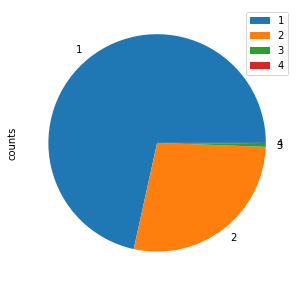

In [75]:
plot= payment.plot.pie(y='counts', figsize=(5, 5))

In [72]:
print(payment['percentage'][1],'of people normally pay in credit card while ',payment['percentage'][2],'of people usually pay in cash')

71.5% of people normally pay in credit card while  27.9% of people usually pay in cash
